In [76]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [77]:
#Import any library here only.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import listdir
import cv2
from tqdm import tqdm
from PIL import Image
import matplotlib.image as mpimg

## <font color='orange'>Task #1</font>

Data loading and understanding data

In [6]:
#Setup and check a gpu connection.
! unzip OpenCodeData.zip

Archive:  OpenCodeData.zip
   creating: OpenCodeData/OpenCodeData/
   creating: OpenCodeData/OpenCodeData/INFECTED/
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_11.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_12.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_13.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_6.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_7.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_8.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_9.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person10_virus_35.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_475.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_477.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_478.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_479.jpeg  

In [7]:
''' Do not change this cell '''
check_gpu()

PLease connect GPU


In [78]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.
images = []
labels = []
infected = []
normal = []
viralInfected = 0
bacterialInfected = 0
normalCt = 0

infected_image_dir = "/content/OpenCodeData/OpenCodeData/INFECTED"
normal_image_dir = "/content/OpenCodeData/OpenCodeData/NORMAL"

for img in os.listdir(infected_image_dir):
  if(img.endswith(".jpeg")):
    img_path = os.path.join(infected_image_dir,img)
    image = mpimg.imread(img_path,1)
    image = cv2.resize(image, (300, 300))
    images.append(image)
    infected.append(image)
    if "bacteria" in img:
      labels.append("Bacteria")
      bacterialInfected += 1
    elif "virus" in img:
      labels.append("Virus")
      viralInfected += 1

for img in os.listdir(normal_image_dir):
  if(img.endswith(".jpeg")):
    img_path = os.path.join(normal_image_dir,img)
    image = mpimg.imread(img_path,1)
    image = cv2.resize(image, (300, 300))
    images.append(image)
    normal.append(image)
    labels.append("Normal")
    normalCt += 1

print(f"Bacterial Images -->{bacterialInfected}")
print(f"Viral Images -->{viralInfected}")
print(f"Normal Image -->{normalCt}")



Bacterial Images -->242
Viral Images -->148
Normal Image -->234


In [ ]:
''' Do not change this cell '''
check_data("task1")

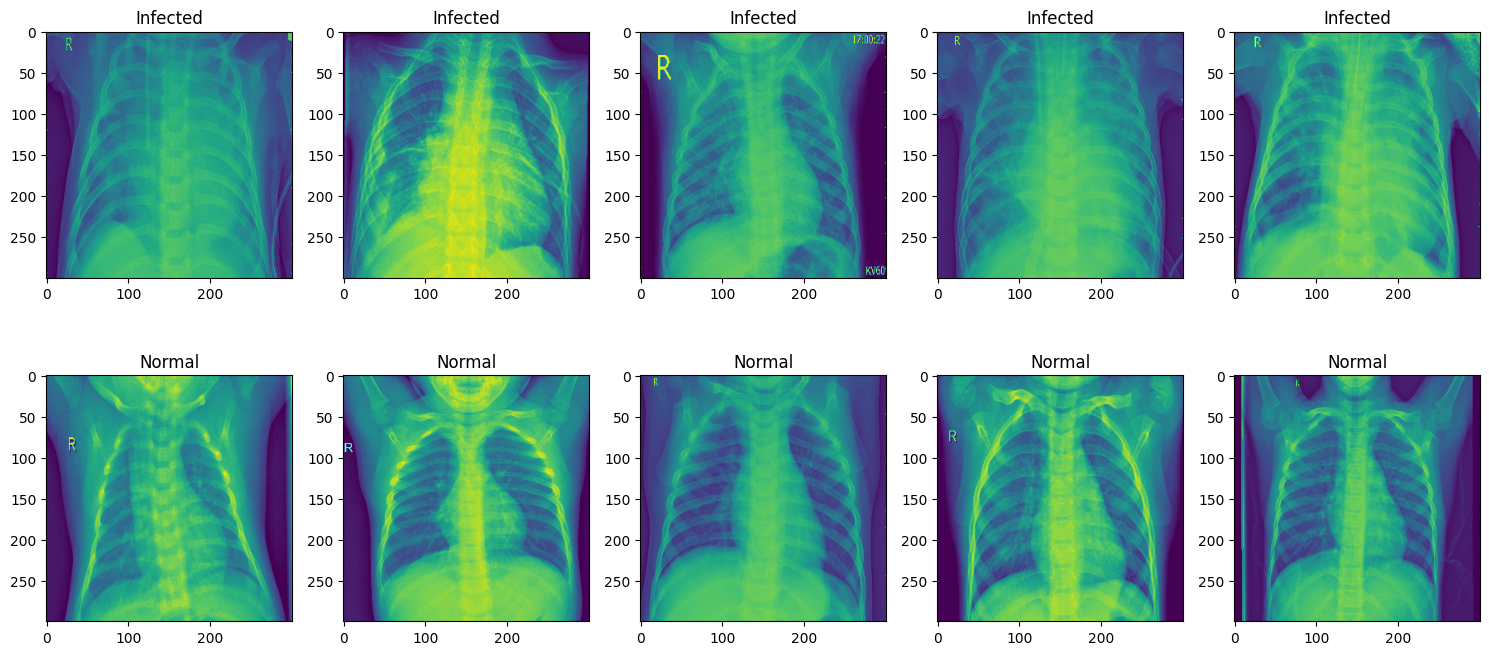

In [79]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.

plt.figure(figsize = (15 , 8))

for i in range(5):
  plt.subplot(2 , 5 , i+1)
  plt.title("Infected")
  plt.imshow(infected[i])

for i in range(5):
  plt.subplot(2 , 5 , i+6)
  plt.title("Normal")
  plt.imshow(normal[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()